In [ ]:
#customer lifetime value analysis is used to estimate the total value of customers to the 
#business over the lifetime of their relationship. It helps companies determine how much to 
#invest in customer acquisition and retention, as well as identify the most valuable customers
#to prioritize for retention efforts

In [11]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("../data/customer_acquisition_data.csv")
print(data.head())

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


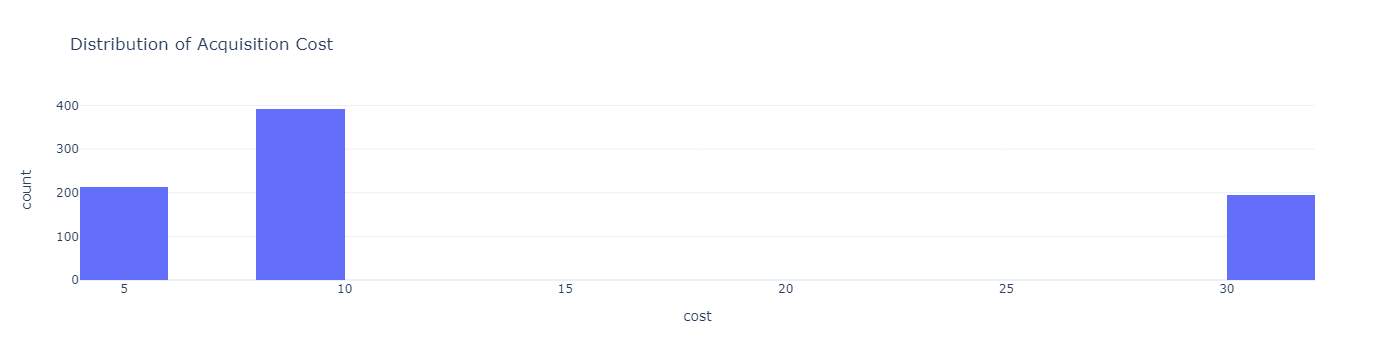

In [12]:
#
fig = px.histogram(data, 
                   x="cost", 
                   nbins=20, 
                   title='Distribution of Acquisition Cost')
fig.show()

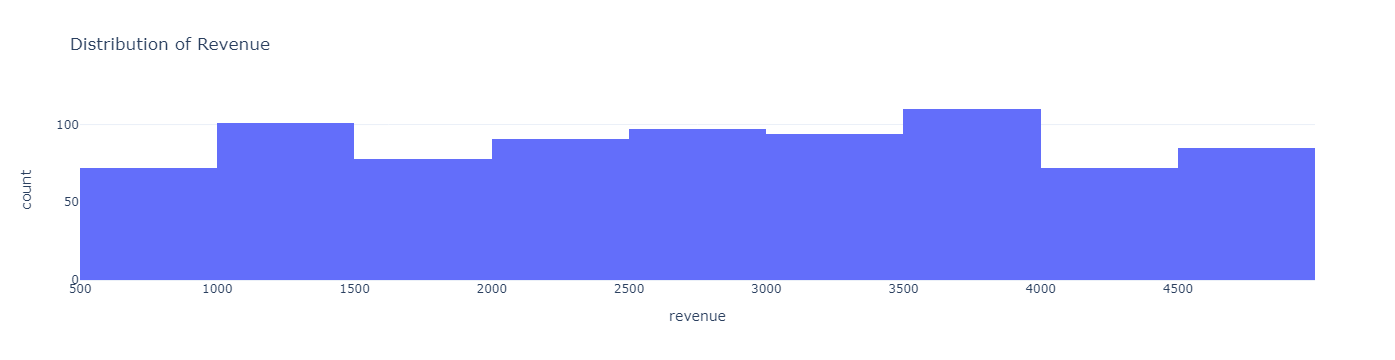

In [13]:
fig = px.histogram(data, 
                   x="revenue", 
                   nbins=20, 
                   title='Distribution of Revenue')
fig.show()

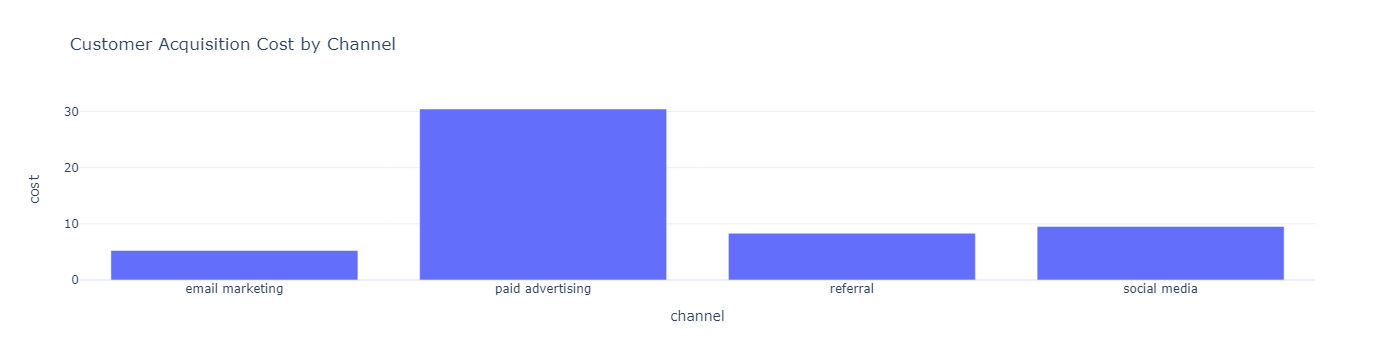

In [14]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

fig = px.bar(cost_by_channel, 
             x='channel', 
             y='cost', 
             title='Customer Acquisition Cost by Channel')
fig.show()

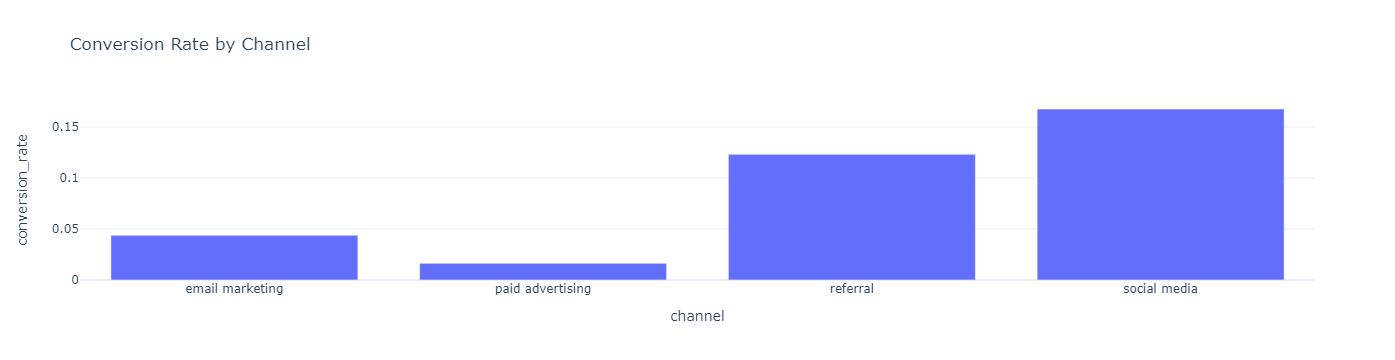

In [15]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

fig = px.bar(conversion_by_channel, x='channel', 
             y='conversion_rate', 
             title='Conversion Rate by Channel')
fig.show()

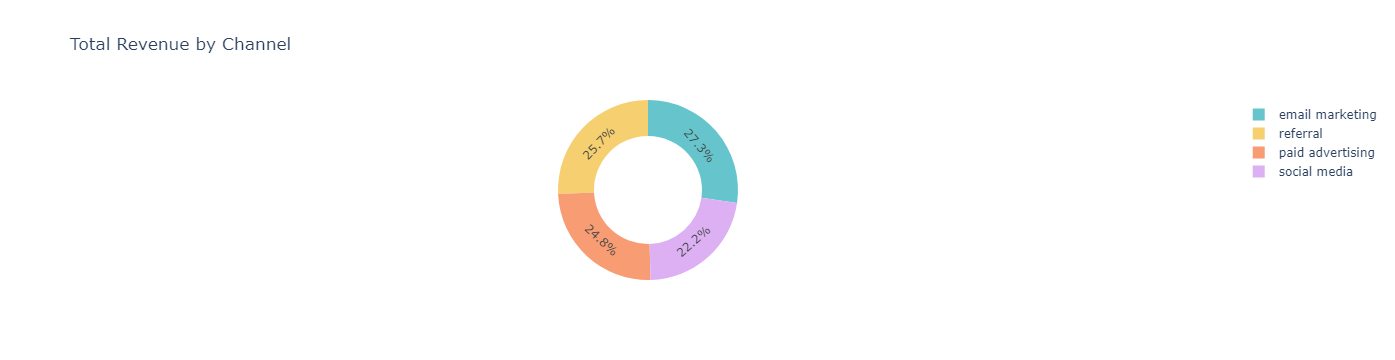

In [16]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

fig = px.pie(revenue_by_channel, 
             values='revenue', 
             names='channel', 
             title='Total Revenue by Channel', 
             hole=0.6, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

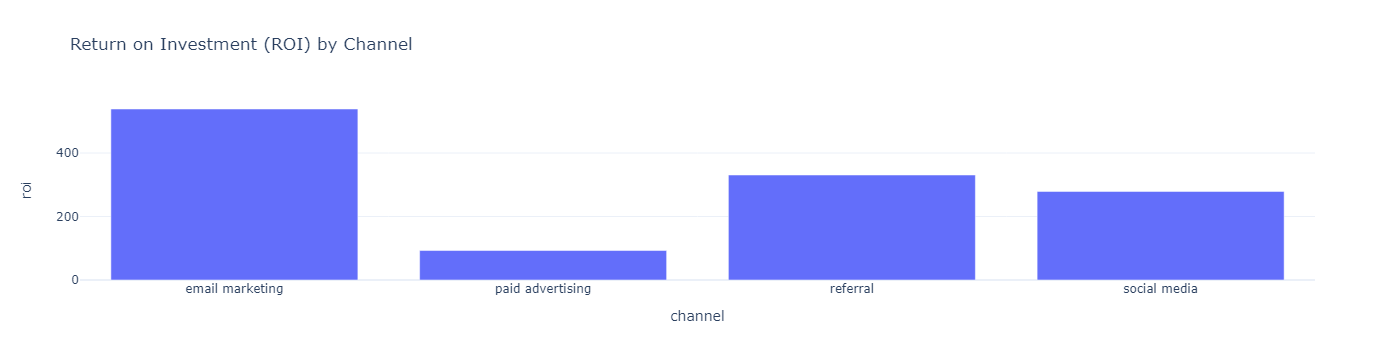

In [17]:
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

fig = px.bar(roi_by_channel, 
             x='channel', 
             y='roi', title='Return on Investment (ROI) by Channel')
fig.show()

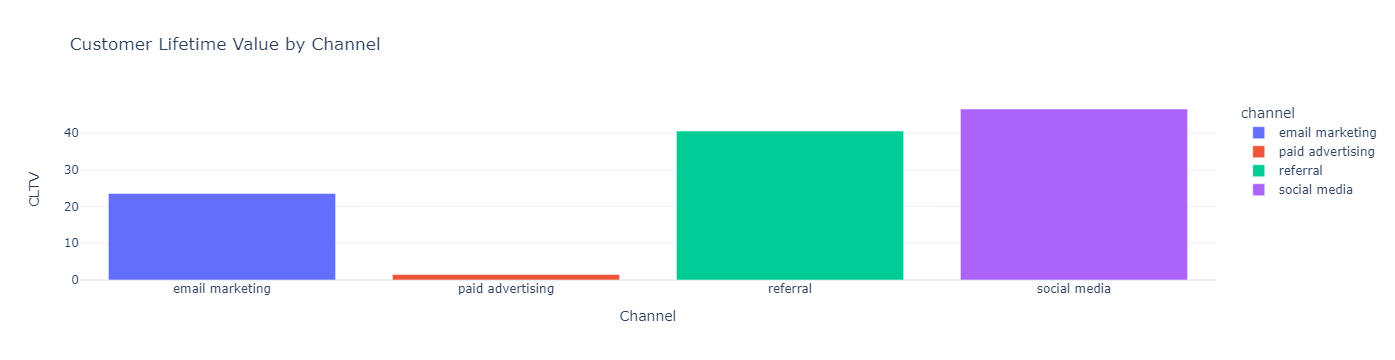

In [18]:
#CLTV = (revenue – cost) * conversion_rate / cost
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

fig = px.bar(channel_cltv, x='channel', y='cltv', color='channel',
             title='Customer Lifetime Value by Channel')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')

fig.show()

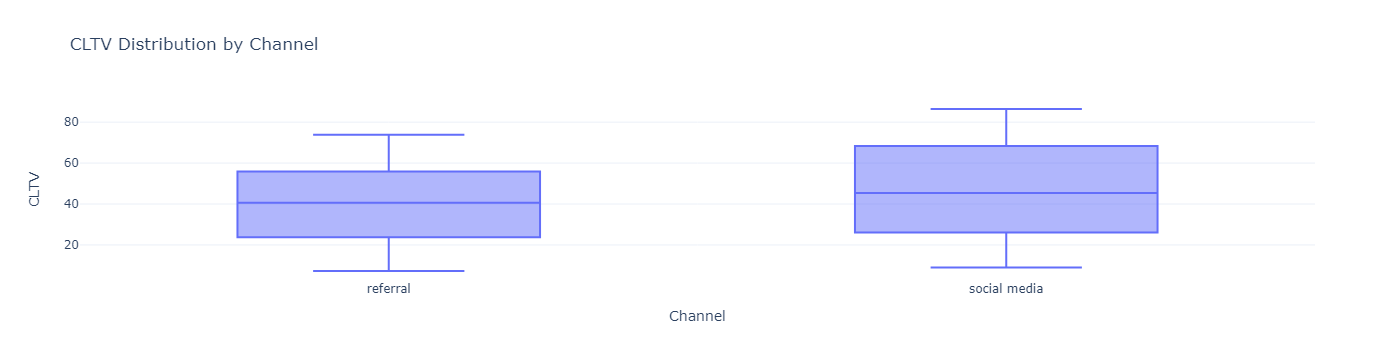

In [19]:
subset = data.loc[data['channel'].isin(['social media', 'referral'])]

fig = px.box(subset, x='channel', y='cltv', title='CLTV Distribution by Channel')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')
fig.update_layout(legend_title='Channel')

fig.show()

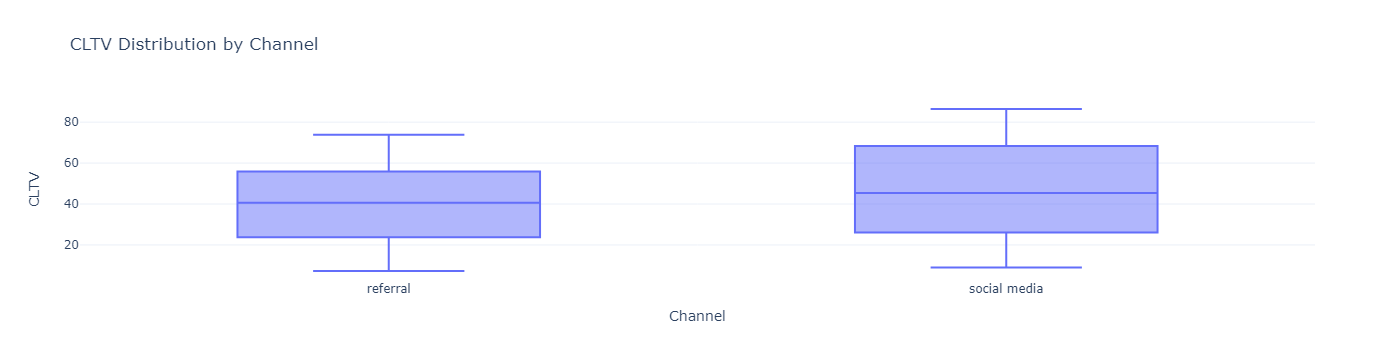

In [20]:
#compare the CLTV distributions of the social media and referral channels:
subset = data.loc[data['channel'].isin(['social media', 'referral'])]

fig = px.box(subset, x='channel', y='cltv', title='CLTV Distribution by Channel')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')
fig.update_layout(legend_title='Channel')

fig.show()